# 1D harmonic oscillator

Setting up the mesh, using the Lagrange-Hermite mesh.

In [1]:
import numpy as np
import lagrange_basis.hermite as hbase

import matplotlib.pyplot as plt

In [2]:
nmesh_hermite = 21

mesh = hbase.mesh_points(nmesh_hermite)
print("Roots:\n",mesh)

lambdas = hbase.lambdas(nmesh_hermite)
print("\nLambdas:\n",lambdas)

Roots:
 [ -5.55035187e+00  -4.77399234e+00  -4.12199555e+00  -3.53197288e+00
  -2.97999121e+00  -2.45355212e+00  -1.94496295e+00  -1.44893425e+00
  -9.61499634e-01  -4.79450707e-01   5.62452342e-16   4.79450707e-01
   9.61499634e-01   1.44893425e+00   1.94496295e+00   2.45355212e+00
   2.97999121e+00   3.53197288e+00   4.12199555e+00   4.77399234e+00
   5.55035187e+00]

Lambdas:
 [ 0.89050765  0.69727965  0.61542081  0.56831312  0.53764373  0.51648141
  0.50156204  0.49114758  0.48425102  0.48030769  0.4790237   0.48030769
  0.48425102  0.49114758  0.50156204  0.51648141  0.53764373  0.56831312
  0.61542081  0.69727965  0.89050765]


In [3]:
# plotting vars
xplot = 0.05*(np.asarray(range(1,1001)) - 1002/2) + 1e-6

# expected eigenvalues
evals_exp = 0.5*(2*np.asarray(range(1,nmesh_hermite + 1)) - 1)

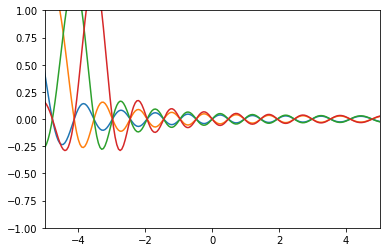

In [14]:
plt.plot(xplot,hbase.basis_func(xplot, 0, mesh))
plt.plot(xplot,hbase.basis_func(xplot, 1, mesh))
plt.plot(xplot,hbase.basis_func(xplot, 2, mesh))
plt.plot(xplot,hbase.basis_func(xplot, 3, mesh))

plt.axis([-5, 5, -1, 1])
plt.show()

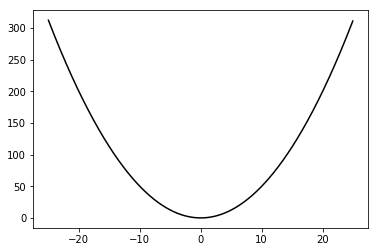

In [5]:
def potential_hermite(mesh):
  return 0.5*np.multiply(mesh,mesh)

pot = potential_hermite(xplot)

plt.plot(xplot,pot,'k-')
plt.show()

In [10]:
hamiltonian = np.zeros([nmesh_hermite,nmesh_hermite])
for row in range(nmesh_hermite):
  for col in range(nmesh_hermite):
    hamiltonian[row,col] = -0.5*hbase.me_ddx_gauss(row, col, mesh)
    if(row == col):
      hamiltonian[row,col] = hamiltonian[row,col] + potential_hermite(mesh[row])

In [11]:
evals, evecs = np.linalg.eig(hamiltonian)

# sorting
idx = evals.argsort()
evals = evals[idx]
evecs = evecs[:,idx]

for state in range(0, evals.size):
  if(evecs[0,state] < 0):
    evecs[:,state] = -1*evecs[:,state]

In [12]:
print("Eigenvalues: \n",evals)
print("Eigenvalue precision: \n",abs(evals-evals_exp))

Eigenvalues: 
 [  0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5  11.5
  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5]
Eigenvalue precision: 
 [  6.66133815e-15   1.19904087e-14   8.88178420e-15   4.44089210e-15
   2.22044605e-14   1.77635684e-14   1.42108547e-14   2.48689958e-14
   2.66453526e-14   2.84217094e-14   1.06581410e-14   3.55271368e-14
   1.42108547e-14   3.37507799e-14   1.24344979e-14   4.97379915e-14
   7.10542736e-15   1.42108547e-14   4.26325641e-14   2.13162821e-14
   7.10542736e-15]


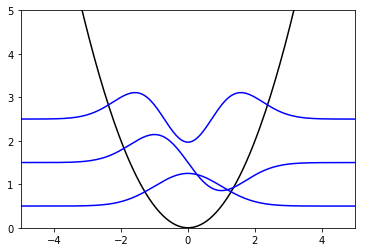

In [13]:
plt.plot(xplot,pot,'k-')
plt.plot(xplot,evals[0] + hbase.wave_function(evecs[:,0],xplot,mesh,1.0),'b-')
plt.plot(xplot,evals[1] + hbase.wave_function(evecs[:,1],xplot,mesh,1.0),'b-')
plt.plot(xplot,evals[2] + hbase.wave_function(evecs[:,2],xplot,mesh,1.0),'b-')
plt.axis([-5, 5, 0, 5])
plt.show()